In [1]:
import pandas as pd 
import numpy as np 
import sklearn 

# Đọc data

In [2]:
df = pd.read_csv('Processed_Data.csv', encoding='utf-8')
df

,price,area,start_date,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,is_owner,type,street_in_front_of_house,width,height,district,province
0,5.40,70.0,2021-12-03,4,3,False,False,False,False,False,Nhà trong hẻm,3.0,7.7,9.5,Quận Hai Bà Trưng,Hà Nội
1,4.45,64.0,2021-12-03,4,4,True,True,True,True,False,Nhà mặt tiền,7.0,4.0,16.0,Quận Tân Phú,Hồ Chí Minh
2,5.60,64.0,2021-12-03,4,4,True,True,True,True,False,Nhà mặt tiền,12.0,4.5,15.0,Quận 12,Hồ Chí Minh
3,1.50,31.0,2021-12-03,3,3,False,False,False,False,False,Nhà mặt tiền,3.0,4.0,8.0,Quận Hà Đông,Hà Nội
4,1.12,30.0,2021-12-03,3,3,False,False,False,False,False,Nhà trong hẻm,3.0,4.0,8.0,Quận Hà Đông,Hà Nội
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36977,9.50,50.0,2021-12-03,7,6,True,True,True,False,False,Nhà trong hẻm,5.0,4.5,11.0,Quận Hoàn Kiếm,Hà Nội
36978,8.00,43.0,2021-12-03,4,4,True,True,True,False,False,Nhà mặt tiền,30.0,3.0,14.0,Quận Hai Bà Trưng,Hà Nội
36979,26.00,80.0,2021-12-03,4,5,False,False,False,False,False,Nhà mặt tiền,25.0,5.0,16.0,Quận Hai Bà Trưng,Hà Nội
36980,10.60,75.0,2021-12-03,5,6,False,False,False,False,False,Nhà trong hẻm,20.0,4.5,18.0,Quận Hai Bà Trưng,Hà Nội


In [3]:
print(df['province'].unique())
print(df['district'].unique())

['Hà Nội' 'Hồ Chí Minh' 'Huế' 'Đà Nẵng' 'Bà Rịa Vũng Tàu' 'Bình Dương'
 'Long An' 'Bắc Ninh' 'Đồng Nai' 'Cần Thơ' 'Nghệ An' 'Lâm Đồng' 'Đắk Lắk'
 'Hải Phòng' 'Cà Mau' 'Bắc Giang' 'Quảng Ngãi' 'Bình Thuận' 'Nam Định'
 'Quảng Trị' 'Thái Bình' 'Khánh Hòa' 'Trà Vinh' 'Thanh Hóa' 'Hải Dương'
 'Bình Định' 'Vĩnh Phúc' 'Ninh Thuận' 'Hưng Yên' 'Lào Cai' 'Bến Tre'
 'Quảng Nam' 'Gia Lai' 'Phú Yên' 'Kiên Giang' 'Hà Nam' 'An Giang'
 'Quảng Ninh' 'Đồng Tháp' 'Sơn La' 'Vĩnh Long' 'Bình Phước' 'Hậu Giang']
['Quận Hai Bà Trưng' 'Quận Tân Phú' 'Quận 12' 'Quận Hà Đông'
 'Huyện Thanh Trì' 'Quận 7' 'Thị xã Hương Thủy' 'Quận Thanh Xuân'
 'Quận Bình Tân' 'Quận Tân Bình' 'Quận Cẩm Lệ' 'Quận Cầu Giấy'
 'Quận Phú Nhuận' 'Quận Đống Đa' 'Quận Gò Vấp' 'Quận Sơn Trà'
 'Quận Ba Đình' 'Quận 2' 'Quận 3' 'Quận 10' 'Quận 5' 'Quận Long Biên'
 'Huyện Nhà Bè' 'Thành phố Vũng Tàu' 'Huyện Bình Chánh' 'Quận Bình Thạnh'
 'Huyện Hóc Môn' 'Thành phố Dĩ An' 'Quận Hải Châu' 'Huyện Đức Hòa'
 'Thành phố Huế' 'Thị xã Bến Cát' 'Thành 

# Phân tích dữ liệu

In [4]:
df_copy = df.copy()
df_copy.drop(columns = ['district','start_date', 'province'], inplace = True)
df_copy

,price,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,is_owner,type,street_in_front_of_house,width,height
0,5.40,70.0,4,3,False,False,False,False,False,Nhà trong hẻm,3.0,7.7,9.5
1,4.45,64.0,4,4,True,True,True,True,False,Nhà mặt tiền,7.0,4.0,16.0
2,5.60,64.0,4,4,True,True,True,True,False,Nhà mặt tiền,12.0,4.5,15.0
3,1.50,31.0,3,3,False,False,False,False,False,Nhà mặt tiền,3.0,4.0,8.0
4,1.12,30.0,3,3,False,False,False,False,False,Nhà trong hẻm,3.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36977,9.50,50.0,7,6,True,True,True,False,False,Nhà trong hẻm,5.0,4.5,11.0
36978,8.00,43.0,4,4,True,True,True,False,False,Nhà mặt tiền,30.0,3.0,14.0
36979,26.00,80.0,4,5,False,False,False,False,False,Nhà mặt tiền,25.0,5.0,16.0
36980,10.60,75.0,5,6,False,False,False,False,False,Nhà trong hẻm,20.0,4.5,18.0


In [5]:
df_copy['is_dinning_room'].value_counts()

True     20733
False    16249
Name: is_dinning_room, dtype: int64

In [6]:
df_copy['is_kitchen'].value_counts()

True     21007
False    15975
Name: is_kitchen, dtype: int64

In [7]:
df_copy['is_terrace'].value_counts()

False    18519
True     18463
Name: is_terrace, dtype: int64

In [8]:
df_copy['is_car_pack'].value_counts()

False    20067
True     16915
Name: is_car_pack, dtype: int64

In [9]:
df_copy['is_owner'].value_counts()

False    36978
True         4
Name: is_owner, dtype: int64

**Cột `is_owner` có sự chênh lệch quá lớn, nghĩa là số lượng tin đăng bán phần lớn đều do môi giới viết. Do đó sẽ thực hiện bỏ cột này**

In [10]:
df_copy.drop(columns = ['is_owner'], inplace = True)

In [11]:
print(df_copy.select_dtypes('bool').columns)

Index(['is_dinning_room', 'is_kitchen', 'is_terrace', 'is_car_pack'], dtype='object')


In [12]:
from sklearn.preprocessing import OneHotEncoder


column_bool_list = df_copy.select_dtypes('bool').columns

encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df = pd.DataFrame(encoder.fit_transform(df_copy[column_bool_list]).toarray())

print(encoder_df)

         0    1    2    3    4    5    6    7
0      1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0
1      0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0
2      0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0
3      1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0
4      1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...  ...  ...  ...
36977  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0
36978  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0
36979  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0
36980  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0
36981  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0

[36982 rows x 8 columns]


In [13]:
renamed_column_bool_list = []

for name in column_bool_list:
    name_false = name + '_False'
    name_true = name + '_True'
    renamed_column_bool_list.append(name_false)
    renamed_column_bool_list.append(name_true)
    
    
print(renamed_column_bool_list)


['is_dinning_room_False', 'is_dinning_room_True', 'is_kitchen_False', 'is_kitchen_True', 'is_terrace_False', 'is_terrace_True', 'is_car_pack_False', 'is_car_pack_True']


In [14]:
encoder_df.columns = renamed_column_bool_list

print(encoder_df)

       is_dinning_room_False  is_dinning_room_True  is_kitchen_False  \
0                        1.0                   0.0               1.0   
1                        0.0                   1.0               0.0   
2                        0.0                   1.0               0.0   
3                        1.0                   0.0               1.0   
4                        1.0                   0.0               1.0   
...                      ...                   ...               ...   
36977                    0.0                   1.0               0.0   
36978                    0.0                   1.0               0.0   
36979                    1.0                   0.0               1.0   
36980                    1.0                   0.0               1.0   
36981                    0.0                   1.0               0.0   

       is_kitchen_True  is_terrace_False  is_terrace_True  is_car_pack_False  \
0                  0.0               1.0              0

In [15]:
df_copy = df_copy.drop(columns = column_bool_list)

final_df = df_copy.join(encoder_df)

final_df

,price,area,floor_number,bedroom_number,type,street_in_front_of_house,width,height,is_dinning_room_False,is_dinning_room_True,is_kitchen_False,is_kitchen_True,is_terrace_False,is_terrace_True,is_car_pack_False,is_car_pack_True
0,5.40,70.0,4,3,Nhà trong hẻm,3.0,7.7,9.5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,4.45,64.0,4,4,Nhà mặt tiền,7.0,4.0,16.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,5.60,64.0,4,4,Nhà mặt tiền,12.0,4.5,15.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.50,31.0,3,3,Nhà mặt tiền,3.0,4.0,8.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.12,30.0,3,3,Nhà trong hẻm,3.0,4.0,8.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36977,9.50,50.0,7,6,Nhà trong hẻm,5.0,4.5,11.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
36978,8.00,43.0,4,4,Nhà mặt tiền,30.0,3.0,14.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
36979,26.00,80.0,4,5,Nhà mặt tiền,25.0,5.0,16.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
36980,10.60,75.0,5,6,Nhà trong hẻm,20.0,4.5,18.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [16]:
type_onehot = pd.get_dummies(final_df['type'])

final_df = final_df.drop('type',axis = 1)
# Join the encoded df
final_df = final_df.join(type_onehot)
final_df  

,price,area,floor_number,bedroom_number,street_in_front_of_house,width,height,is_dinning_room_False,is_dinning_room_True,is_kitchen_False,is_kitchen_True,is_terrace_False,is_terrace_True,is_car_pack_False,is_car_pack_True,Nhà mặt tiền,Nhà trong hẻm
0,5.40,70.0,4,3,3.0,7.7,9.5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,1
1,4.45,64.0,4,4,7.0,4.0,16.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1,0
2,5.60,64.0,4,4,12.0,4.5,15.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1,0
3,1.50,31.0,3,3,3.0,4.0,8.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0
4,1.12,30.0,3,3,3.0,4.0,8.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36977,9.50,50.0,7,6,5.0,4.5,11.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1
36978,8.00,43.0,4,4,30.0,3.0,14.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1,0
36979,26.00,80.0,4,5,25.0,5.0,16.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0
36980,10.60,75.0,5,6,20.0,4.5,18.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,1


In [17]:
from sklearn.model_selection import train_test_split

# Chia dataset

Chia dataset theo tỉ lệ train / val / test = 0.7 / 0.1 / 0.2

In [18]:
x = final_df.loc[:, final_df.columns != 'price']
y = final_df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=42)

# Xây dựng regressor

Ở đây nhóm sử dụng XGBoost để làm mô hình dự đoán giá nhà, do trong tập dữ liệu có những cột mang đặc trưng categorical (có thứ tự và không có thứ tự), và những cột categorical này không hoạt động hiệu quả trên các mô hình như linear regression hay multi layer perceptron.

In [19]:
!pip install xgboost

In [20]:
import xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [21]:
# params = {
#         'min_child_weight': [1, 5, 10],
#         'learning_rate':[0.01,0.03,0.06,0.1,0.3],
#         'n_estimators' :[500,1000,2000],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [4, 5, 6 ,7]
#           }

In [22]:
# split_index = [-1]*len(x_train) + [0]*len(x_val)
# X_train_val = np.concatenate((x_train, x_val), axis=0)
# y_train_val = np.concatenate((y_train, y_val), axis=0)
# pds = PredefinedSplit(test_fold = split_index)

Estimators =  50 Train Score 2.8224111896412847 Validation Score 3.184241539540565
Estimators =  100 Train Score 2.599269213400563 Validation Score 3.0922741554390742
Estimators =  250 Train Score 2.143980757747243 Validation Score 2.955126648219413
Estimators =  500 Train Score 1.6877532232699675 Validation Score 2.8270937813754564
Estimators =  1000 Train Score 1.2047810744057736 Validation Score 2.710520619024326
Estimators =  1500 Train Score 0.9552095085580118 Validation Score 2.6727500742210357
Estimators =  2000 Train Score 0.7942784418106498 Validation Score 2.647347632079229


Text(0.5, 1.0, 'Estimators vs score at depth of 7')

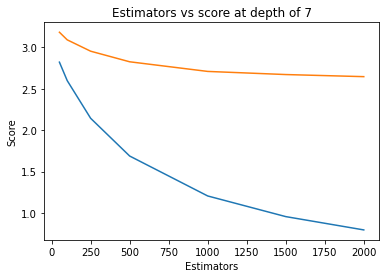

In [23]:
estimators = [50, 100, 250, 500, 1000, 1500, 2000]

train_scores = []
val_scores = []
for i in estimators:
    model = xgboost.XGBRegressor(n_estimators=i, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    train_score = mean_absolute_error(y_train, y_pred)
    y_pred = model.predict(x_val)
    val_score = mean_absolute_error(y_val, y_pred)
    
    train_scores.append(train_score)
    val_scores.append(val_score)
    
    print('Estimators = ',i,'Train Score',train_score,'Validation Score',val_score)

plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,val_scores,label='Validation Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 7')

Estimators =  3 Train Score 2.8826337039895815 Validation Score 3.211265506435259
Estimators =  5 Train Score 2.1562159188958945 Validation Score 2.953184583031251
Estimators =  7 Train Score 1.2047810744057736 Validation Score 2.710520619024326
Estimators =  9 Train Score 0.4718574556470424 Validation Score 2.527471026186107
Estimators =  11 Train Score 0.2146035740501835 Validation Score 2.47667784022418
Estimators =  13 Train Score 0.15618260195669992 Validation Score 2.4425392014284526


Text(0.5, 1.0, 'Depth vs score at estimator of 1000')

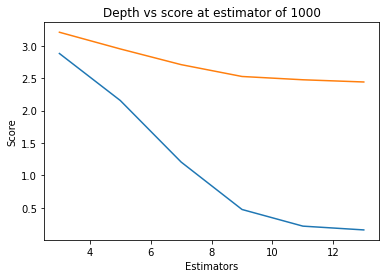

In [24]:
depths = [3,5,7,9,11,13]

train_scores = []
val_scores = []
for i in depths:
    model = xgboost.XGBRegressor(n_estimators=1000, max_depth=i, eta=0.1, subsample=0.7, colsample_bytree=0.8)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    train_score = mean_absolute_error(y_train, y_pred)
    y_pred = model.predict(x_val)
    val_score = mean_absolute_error(y_val, y_pred)
    
    train_scores.append(train_score)
    val_scores.append(val_score)
    
    print('Estimators = ',i,'Train Score',train_score,'Validation Score',val_score)

plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,val_scores,label='Validation Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Depth vs score at estimator of 1000')

In [25]:
model = xgboost.XGBRegressor(n_estimators=1000, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, ...)

In [26]:
y_pred = model.predict(x_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('MAE:', mae)
print('RMSE:', rmse)
print('MAPE:', mape)

MAE: 2.435111887716761
RMSE: 4.5100195651240025
MAPE: 0.37062408885897125


In [27]:
def plot_evaluate(y_true, y_pred):
    plt.plot(y_true, y_pred, 'b.')
    x = [np.min(y_true), np.max(y_true)]
    y = x
    plt.plot(x, y, 'r')
    plt.title('XGBoost')
    plt.xlabel('Reality')
    plt.ylabel('Predict')
    plt.show()

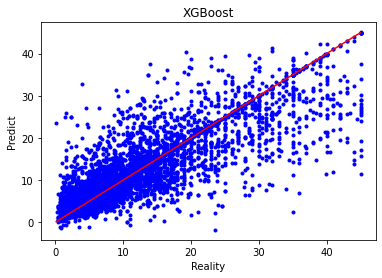

In [28]:
plot_evaluate(y_test, y_pred)